# TP1: Canny Edges

Read, understand, and complete the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). 

To execute a notebook, you will need to [install jupyter](http://jupyter.org/install.html). If you are using anaconda (strongly advised) you will have necessary libraries, if not, you may need to install them. If you cannot/don't want to use notebooks, you can return both your python code and a report in pdf. 

Return your work by e-mail using a single file (ipynb or zip) with the format 'introvis17_tp1_yourname.ipynb'

The first part is about basic image processing in Python, the second guides you in the implementation of the Canny edge detector.

## 1. Basic image processing in Python

Here are a set of useful libraries for image processing. You will need to refer to the online documentation of the different libraries to complete the TP.

In [1]:
import numpy as np 
# this is the key library for manipulating arrays. Use the online ressources! http://www.numpy.org/

import matplotlib.pyplot as plt 
# used to read images, display and plot http://matplotlib.org/api/pyplot_api.html . 
#You can also check this simple intro to using ipython notebook with images https://matplotlib.org/users/image_tutorial.html

%matplotlib inline
# to display directly in the notebook

import scipy.ndimage as ndimage
# one of several python libraries for image procession

import imageio
# For image saving

import random

import math

plt.rcParams['image.cmap'] = 'gray' 
# by default, the grayscale images are displayed with the jet colormap: use grayscale instead

Here is a simple example how to read and display an image.

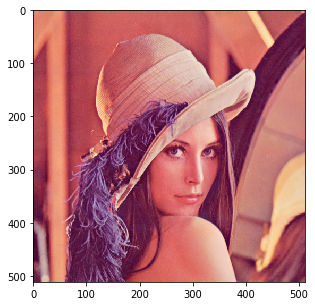

In [2]:
name='lena.jpg'
I=plt.imread(name)
plt.figure(figsize=(5,5)) # this line is not necessary, but allows you to control the size of the displayed image
plt.imshow(I)
plt.show() # this is necessary only if you want to display several images

a- What's the size of the image I? Its type? The type of the values it contains? What's its range? 

In [3]:
# complete this part. 
# Tip: look for numpy attributes (e.g. https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) 
# and functions to do what you want (e.g. np.min)

img_size = I.shape[:2]
size_x, size_y = img_size

print('The image size is {}'.format(img_size))
print('It is of type {}'.format(type(I)))
print('It\'s values are of type {}'.format(type(I[0][0][0])))
print('Values are in range 0 to 255')

The image size is (512, 512)
It is of type <class 'numpy.ndarray'>
It's values are of type <class 'numpy.uint8'>
Values are in range 0 to 255


b- Here is a simple function to load an image and crop it according to a bounding box. Make sure you understand every line

In [4]:
def load_image_v0(name,crop_window=-1): 
    I=plt.imread(name)
    if crop_window!=-1:
        I=I[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
    I=I.astype('float')/255
    return I

Use the function to display and save a grayscale version of the 100x50 pixels of the bottom left corner of 'lena'. 

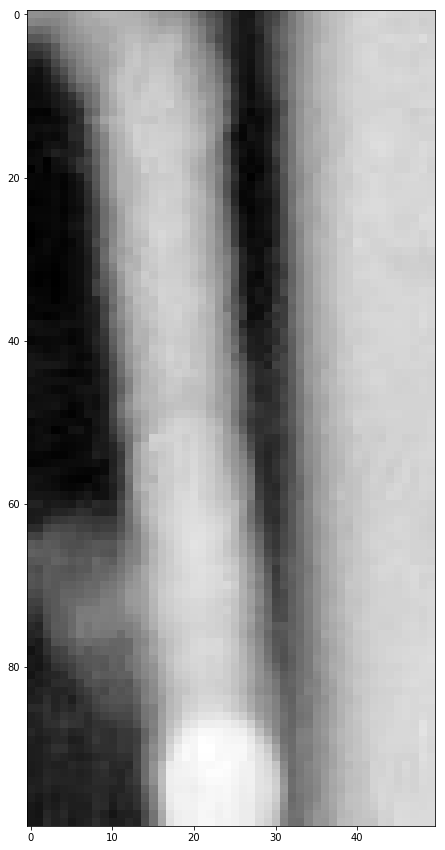

In [5]:
def show_img(I):
    plt.figure(figsize=(15,15)) # this line is not necessary, but allows you to control the size of the displayed image
    plt.imshow(I)
    
def show_imgs(imgs):
    #Display all images of an array in the notebook
    f = plt.figure(figsize=(12,24))
    for i in range(len(imgs)):
        f.add_subplot(1, len(imgs), i+1)
        plt.imshow(imgs[i])

    
def rgb2gray(rgb):
    #Convert the rgb image to a greyscale image
    return np.dot(rgb[...,:3], [0.2989, 0.587, 0.114])

def save_img(I, name):
    #Save the image at path 'name'
    imageio.imwrite(name, (I * 255).astype('uint8'))

I = rgb2gray(load_image_v0('lena.jpg', crop_window=[size_x - 100, size_x, 0, 50]))

show_img(I)

save_img(I, 'lena_grey_bottom_left.jpg')

c- Modify the following function so that it can load an RGB image and convert it to a grayscale image using the formula L=0.2989 * R + 0.5870 * G + 0.1140 * B, where R, G and B are the three color channels of the color image and L is the luminance (i.e. the grayscale image). Include a test so that your function also works if the input image is grayscale.

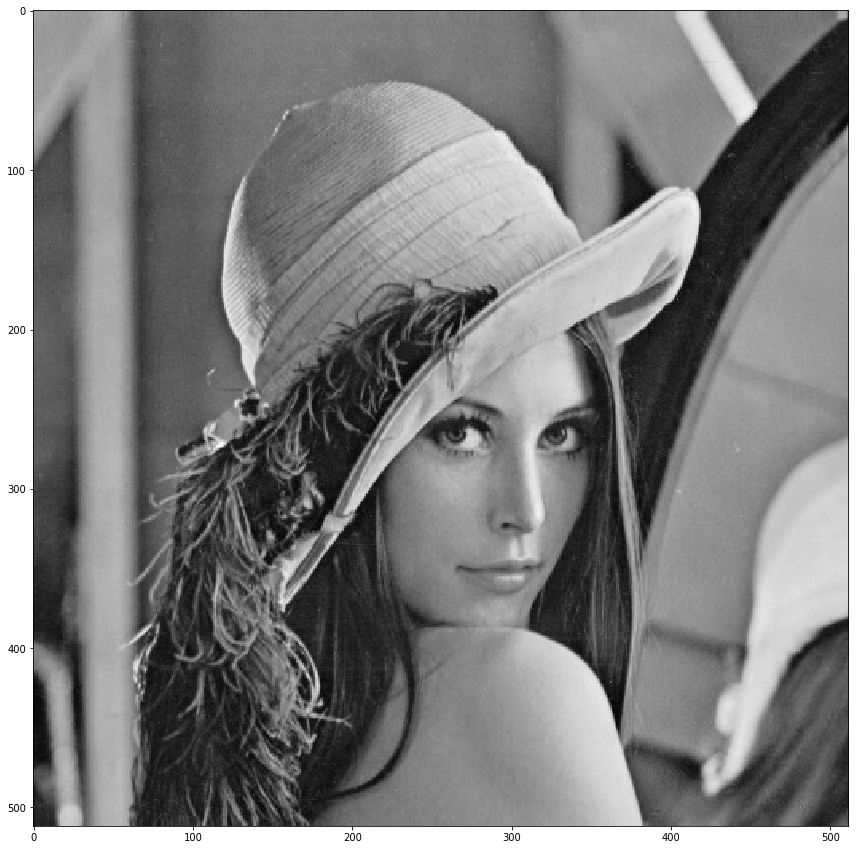

In [6]:
def load_image(name,crop_window=-1): 
    I=plt.imread(name)
    
    if crop_window!=-1:
        I=I[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
    I=I.astype('float')/255
    
    if len(I.shape) == 2:
        #If there is no third component for the color then the image is grey
        return I
    
    return rgb2gray(I)

I = load_image('lena.jpg')
show_img(I)

Use your function to load a grayscale version of lena and save it as a png image.

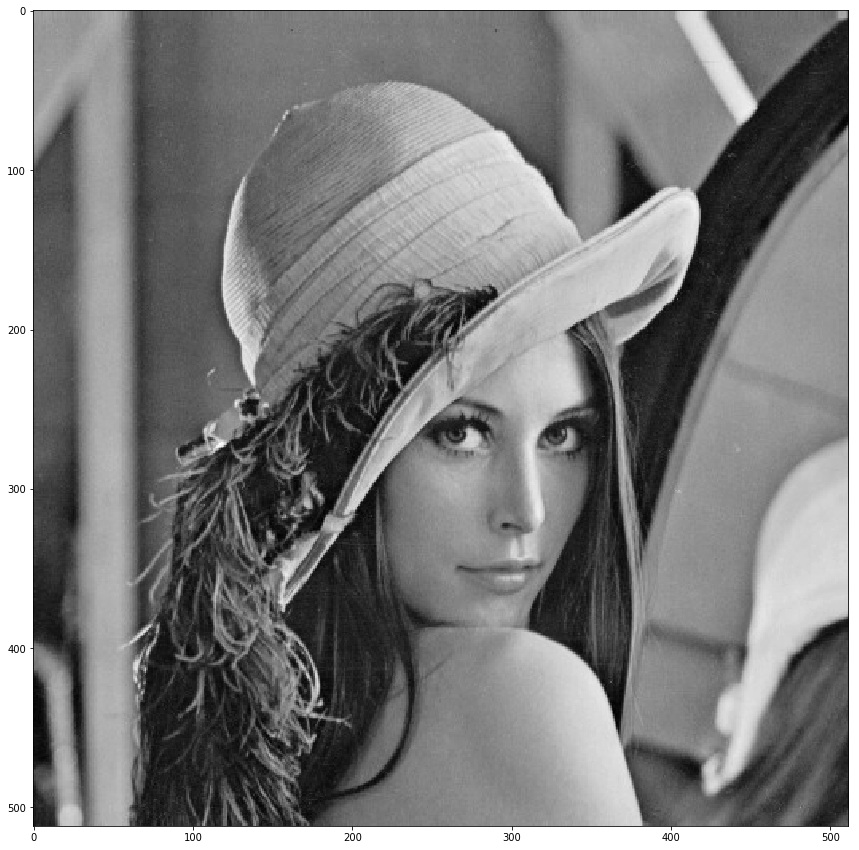

In [7]:
#Work with a greyscale version of lena.jpg

#I comment it in order for the notebook to run without the image 'lena_grey.jpg'

#I_grey = load_image('lena_grey.jpg')
#show_img(I_grey)

d- Here is an example of how to convolve an image with a Gaussian. What is the size of the output? What are the border conditions? Replace the border conditions with zero padding and comment on the result

The size of Ib is (512, 512)
The size of Ib_const is (512, 512)


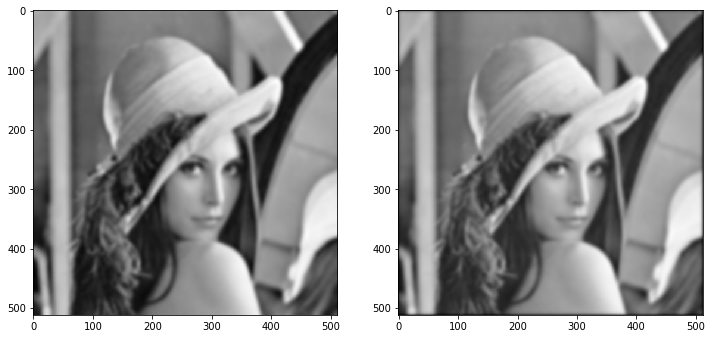

In [8]:
#The default mode parameter value is 'reflect'
#The input is extended by reflecting about the edge of the last pixel
Ib = ndimage.gaussian_filter(I, sigma=3)
print('The size of Ib is {}'.format(Ib.shape))

#The mode paramter value 'constant' 
#The input is extended by filling all values beyond the edge with value 0.0
Ib_const = ndimage.gaussian_filter(I, sigma = 3, mode = 'constant')
print('The size of Ib_const is {}'.format(Ib_const.shape))

show_imgs([Ib, Ib_const])

We observe a dark strip at the edges of the image. It's due to the fact that the convolution is done using dark pixels arround the image.

e- What does the following code do? What's its visual effect on the image?

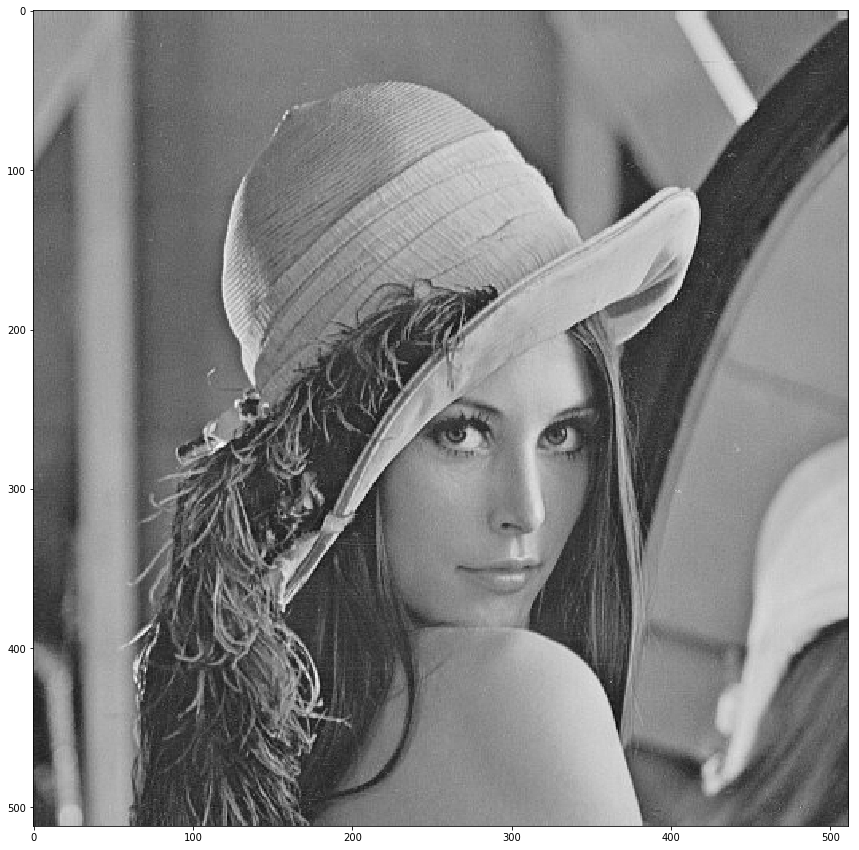

In [9]:
k = np.array([[-1./9, -1./9, -1./9],
               [-1./9, 17./9, -1./9],
               [-1./9, -1./9, -1./9]])
O=ndimage.convolve(I, k)

show_img(O)

This code apply compute the result image of a convolution between the image I and the kernel k. This kernel accentuates the differences with local average. It results that the result image is more detailed.

f- Write a function "compute_gradient" that returns three images containing the input image derivative along the horizontal direction, the vertical direction, and the gradient norm. It should use forward differences, and take an optional argument "sigma" that gives the scale of the derivative. What is the size of the output compared to the size of the input?

In [10]:
def compute_gradient(I, sigma=2):
    I = ndimage.filters.gaussian_filter(I, sigma)
    
    dx_normal = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    dy_normal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    dx_I_conv_g = ndimage.filters.convolve(I, dx_normal)
    dy_I_conv_g = ndimage.filters.convolve(I, dy_normal)
    
    grad_norm = np.hypot(dx_I_conv_g, dy_I_conv_g)
    
    return dx_I_conv_g, dy_I_conv_g, grad_norm

The size of the ouputs is the same as the size of the image.

g- Visualize the three images returned by your function for different values of sigma. Comment.


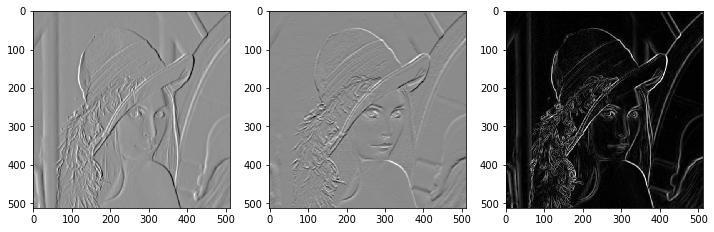

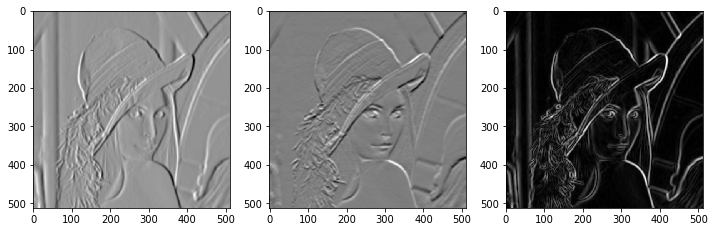

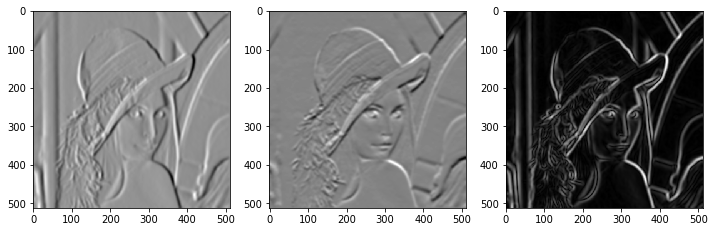

In [11]:
show_imgs(list(compute_gradient(I, 1)))
show_imgs(list(compute_gradient(I, 2)))
show_imgs(list(compute_gradient(I, 3)))

As sigma increases, the blur in the image increases.

If you had difficulties to do this first part, it might be good to look at a few more examples before writting your own code. You can find many python tutorial for image processing online, for example http://www.scipy-lectures.org/advanced/image_processing/

## 2. Canny edges

a- Compute a binary image corresponding to thresholding the norm of the gradient. Discuss the parameters (there are two) and their influence of the results

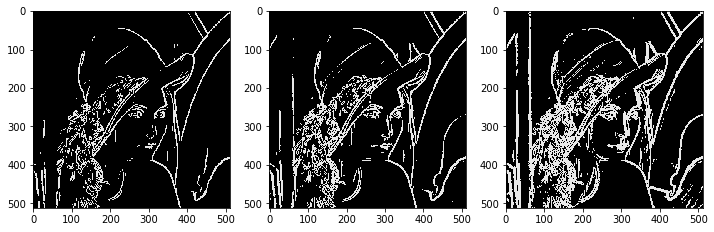

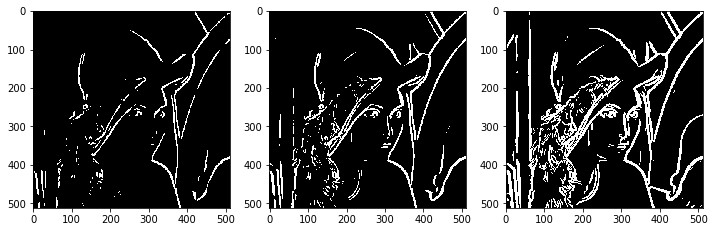

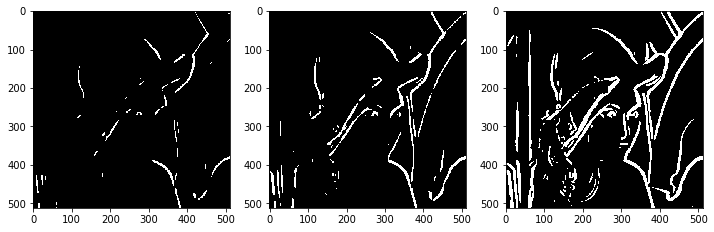

In [12]:
def apply_filter(I, filter):
    # Apply a filter on each pixel of a greyscale image
    I_res = I.copy()
    
    size_x, size_y = I.shape
    for i in range(size_x - 1):
        for j in range(size_y - 1):
            I_res[i][j] = filter(I, i, j)
    
    return I_res

def compute_binary(I, sigma, threshold):
    grad_norm = compute_gradient(I, sigma)[2]

    filter = lambda I, i, j: 1.0 if grad_norm[i][j] >= threshold else 0.0
    return apply_filter(grad_norm, filter)

show_imgs([compute_binary(I, 1, 0.4), compute_binary(I, 1, 0.3), compute_binary(I, 1, 0.2)])
show_imgs([compute_binary(I, 2, 0.4), compute_binary(I, 2, 0.3), compute_binary(I, 2, 0.2)])
show_imgs([compute_binary(I, 3, 0.4), compute_binary(I, 3, 0.3), compute_binary(I, 3, 0.2)])

Sigma controls the details level. The higher it is, the less details of the original image we have. Therefore less edges are visible. The threshold controls directly the amount of edges to keep. Only those where the gradient norm is higher that it. The higher the threshold, the less edges are visible.

b- Write a function "nms(gradient_norm)" which takes as input the gradient norm and outputs a binary images with value 1 only for pixels that correspond to a maximum in the direction of the gradient.

In [13]:
def filter_max_o(grad_norm, i, j, angles):
    pi = np.pi
    orientations = [0, pi / 4, pi / 2, 3 * pi / 4]
    
    diffs = [abs(o - angles[i][j]) for o in orientations]
    
    #Index of the nearest angle in the array orientations
    o_id = np.argmin(np.array(diffs))
    
    if (o_id == 2 and (grad_norm[i][j] >= grad_norm[i][j - 1] and grad_norm[i][j] >= grad_norm[i][j + 1])) or \
        (o_id == 3 and (grad_norm[i][j] >= grad_norm[i + 1][j - 1]) and (grad_norm[i][j] >= grad_norm[i - 1][j + 1])) or \
        (o_id == 0 and (grad_norm[i][j] >= grad_norm[i - 1][j]) and (grad_norm[i][j] >= grad_norm[i + 1][j])) or \
        (o_id == 1 and (grad_norm[i][j] >= grad_norm[i - 1][j - 1]) and (grad_norm[i][j] >= grad_norm[i + 1][j + 1])):
        return 1.0
    else:
        return 0.0
    
def nms(grad_norm, angles):
    return apply_filter(np.zeros(grad_norm.shape), lambda I, i, j: filter_max_o(grad_norm, i, j, angles))

c- Combine 'a' and 'b' to extract edges with a gradient norm larger than a given threshold.

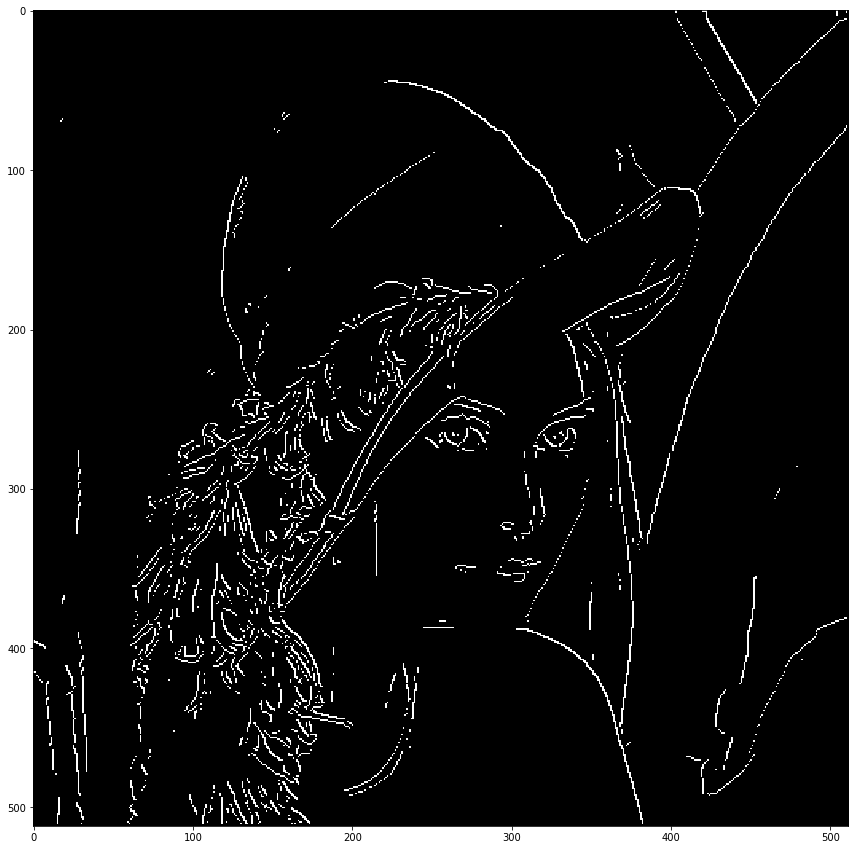

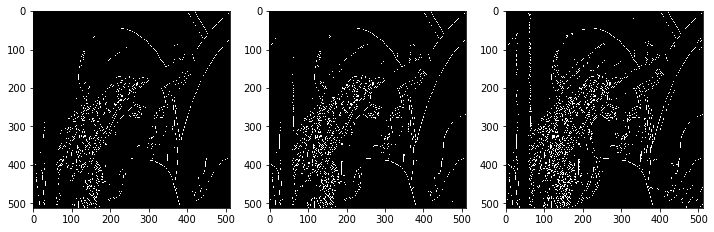

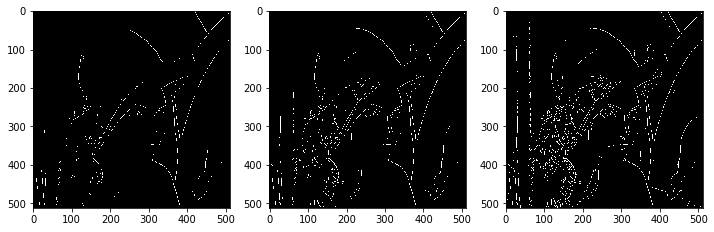

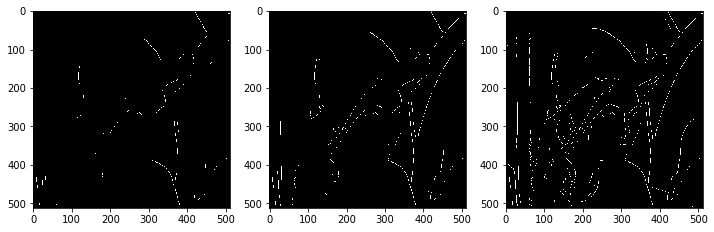

In [19]:
def canny_edge(I, sigma, threshold):
    x_grad, y_grad, grad_norm = compute_gradient(I, sigma)

    #Compute the directions given by the gradient at each pixel
    angles = np.arctan2(y_grad, x_grad)
    angles += (2 * np.pi) % 2 * np.pi
    
    #Apply non max supression
    I = nms(grad_norm, angles)
    
    #Keep only pixels where the gradient norm is higher than the threshold
    filter = lambda I, i, j: I[i][j] if grad_norm[i][j] >= threshold else 0.0
    return apply_filter(I, filter)
    
show_img(canny_edge(I, 1, 0.4))
    
show_imgs([canny_edge(I, 1, 0.4), canny_edge(I, 1, 0.3), canny_edge(I, 1, 0.2)])
show_imgs([canny_edge(I, 2, 0.4), canny_edge(I, 2, 0.3), canny_edge(I, 2, 0.2)])
show_imgs([canny_edge(I, 3, 0.4), canny_edge(I, 3, 0.3), canny_edge(I, 3, 0.2)])

d- Add the hysteresis thresholding to 'c' to implement a function computing the Canny esdges.

Here is one way to do the hysteresis thresholding. Keep a list of the edges for which you have to visit neighboors. Initialize the list with the edges corresponding to the most discriminative threshold. For each edge you are sure of (i.e. in the list), you have to check if its neighboors are considered edges using the less discriminative threshold. If they are, add them to the output edges and in the list of edges to visit.

e- Use your algorithm with different parameters and comment on their effects.

In [15]:
from collections import deque

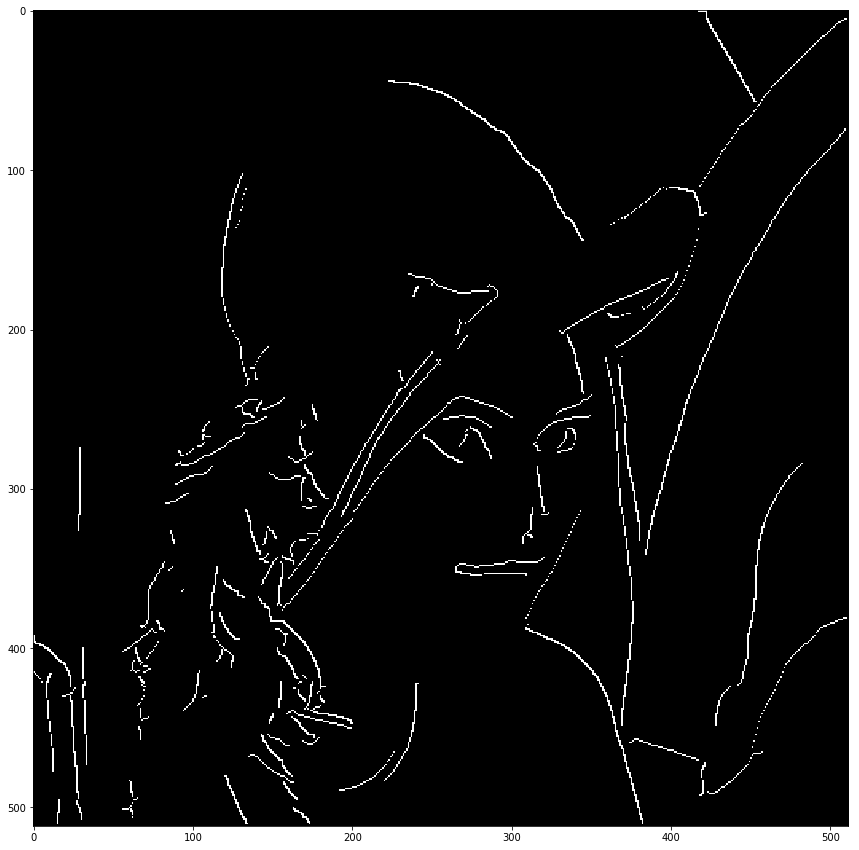

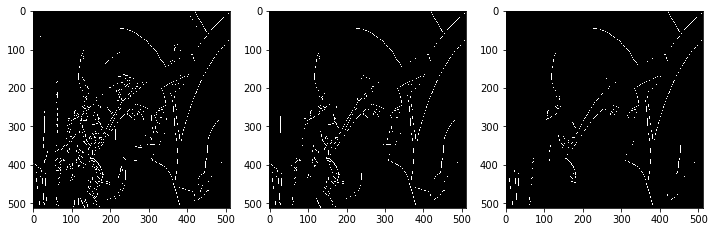

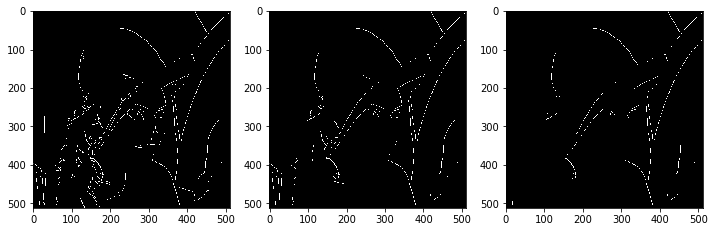

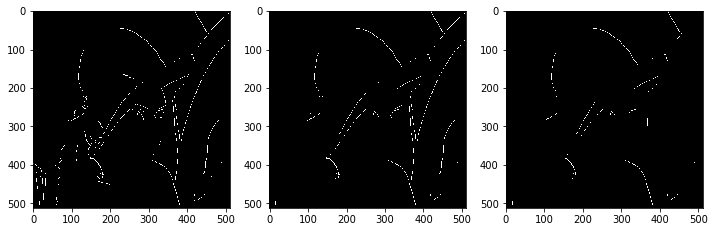

In [24]:
def compute_edges(I):
    #Return the list of position where there is an edge i.e where the pixel is white
    
    edges = []
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] == 1.0:
                edges.append((i,j))
    
    return edges

def from_edges_compute_img(edges, size_x, size_y):
    #From a list of position of the edges compute the corresponding image
    
    I = np.zeros((size_x, size_y))
    
    for i, j in edges:
        I[i][j] = 1.0
    
    return I

def double_threshhold_canny_edge(I, sigma, lower_threshold, higher_threshold):
    #Final canny edges function
    
    I_low = canny_edge(I, sigma, lower_threshold)
    I_high = canny_edge(I, sigma, higher_threshold)
    
    arround = lambda i, j: [(i-1,j-1), (i-1,j), (i-1,j+1), (i,j-1), (i,j+1), (i+1,j-1), (i+1,j), (i+1,j+1)]
    
    #Start with the edges corresponding to the highest threshold
    edges = compute_edges(I_high)
    
    #Keep a list of edges to handle 
    edges = deque(edges)
    
    #List of edges to return 
    output_edges = []
    
    while len(edges) > 0:
        #While there remains edges, take one
        i, j = edges.popleft()
        
        #Add it to the result then take its neighboors edges
        output_edges.append((i, j))
        
        for k, l in arround(i, j):
            if k < I.shape[0] and l < I.shape[1] and k >= 0 and l >= 0:
                if I_low[k][l] == 1.0:
                    #If the neighboor is an edge add it to the edges to handle
                    if (k, l) not in edges and (k, l) not in output_edges:
                        edges.append((k, l))
    
    size_x, size_y = I.shape
    
    return from_edges_compute_img(output_edges, size_x, size_y)

show_img(I = double_threshhold_canny_edge(I, 2, 0.1, 0.4))

show_imgs([double_threshhold_canny_edge(I, 2, 0.1, 0.3), double_threshhold_canny_edge(I, 2, 0.2, 0.4), double_threshhold_canny_edge(I, 2, 0.3, 0.5)])
show_imgs([double_threshhold_canny_edge(I, 2, 0.1, 0.4), double_threshhold_canny_edge(I, 2, 0.2, 0.5), double_threshhold_canny_edge(I, 2, 0.3, 0.6)])
show_imgs([double_threshhold_canny_edge(I, 2, 0.1, 0.5), double_threshhold_canny_edge(I, 2, 0.2, 0.6), double_threshhold_canny_edge(I, 2, 0.3, 0.7)])

We keep sigma = 2. We observe that the higher the difference between the low and the high threshold, the less edges are visible. Of course, if we increase the low threshold, less edges are visible.